In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from muon.deep_clustering.clustering import Config, Cluster
from muon.utils.subjects import Subjects

import os
import pickle
import math
import logging
import numpy as np
logger = logging.getLogger(__name__)

config = 'mnt/dec/dec_50_clusters/config_jupyter.json'
config = Config.load(config)
print(config.__dict__)
subjects = pickle.load(open(config.subjects, 'rb'))
cluster = Cluster.create(subjects, config)

logger.info('Training model')
cluster.train()
pred = cluster.predictions
logger.info('Done training network')


20171206_19:16:33 INFO Initialized logging


/home/michael/Documents/Zooniverse/repos/swap/conf
/home/michael/Documents/Zooniverse/repos/swap/conf/swap.conf


Using TensorFlow backend.


{'ae_weights': 'mnt/dec/dec_output/ae_weights.h5', 'tol': 0.001, 'batch_size': 256, 'momentum': 0.9, 'subjects': 'mnt/dec/dec_output/subjects.pkl', 'save_dir': 'mnt/dec/dec_50_clusters', 'maxiter': 20000.0, 'nodes': [500, 500, 2000, 10], 'lr': 0.01, 'update_interval': 140, 'n_clusters': 50}


20171206_19:16:41 INFO Training model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_________________________________________________________________


20171206_19:16:45 INFO Done training network


0 395 0 0.994936708861
1 94 1 0.617021276596
2 379 0 0.97889182058
3 412 0 0.978155339806
4 236 0 0.991525423729
5 351 0 1.0
6 217 0 0.944700460829
7 341 0 0.950146627566
8 304 0 0.990131578947
9 339 0 0.985250737463
10 433 0 0.981524249423
11 441 0 1.0
12 269 0 0.936802973978
13 90 1 0.588888888889
14 246 0 0.983739837398
15 362 0 0.991712707182
16 466 0 0.989270386266
17 83 1 0.578313253012
18 389 0 0.969151670951
19 188 0 0.898936170213
20 279 0 0.985663082437
21 383 0 0.986945169713
22 445 0 0.988764044944
23 348 0 0.985632183908
24 488 0 0.987704918033
25 516 0 0.976744186047
26 309 0 0.919093851133
27 333 0 0.975975975976
28 336 0 0.916666666667
29 279 0 0.971326164875
30 286 0 0.996503496503
31 227 0 0.823788546256
32 82 1 0.585365853659
33 295 0 0.993220338983
34 307 0 0.99348534202
35 189 0 0.878306878307
36 308 0 0.980519480519
37 299 0 0.959866220736
38 249 0 0.95983935743
39 217 0 0.981566820276
40 272 0 0.970588235294
41 420 0 0.97380952381
42 115 1 0.608695652174
43 288 0

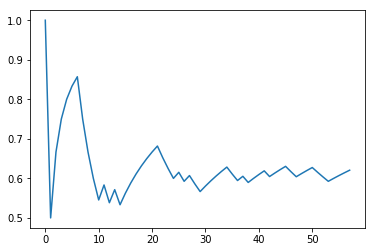

In [2]:
cluster.feature_space.plot_acc(47)
plt.show()

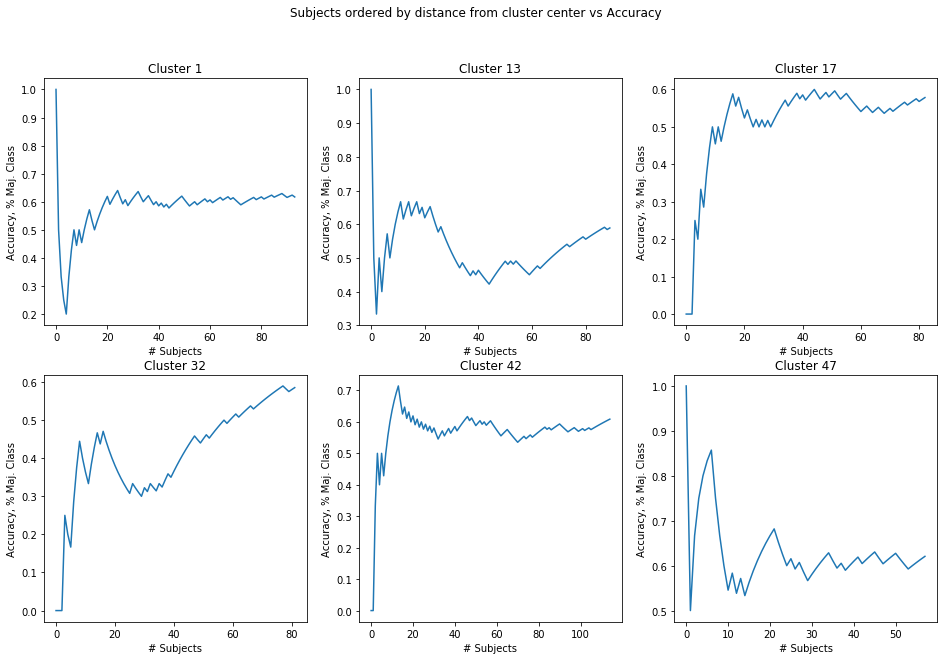

In [10]:
fig = plt.figure(figsize=(16, 10))
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.4,
#                     wspace=.2)


cm = cluster.predictions.cluster_mapping
clusters = np.where(cm['majority_class']==1)[0]
w = min(3, len(clusters))
l = math.ceil(len(clusters) / w)
for i, c in enumerate(clusters):
    ax = fig.add_subplot(l, w, i + 1)
    ax.set_xlabel('# Subjects')
    ax.set_ylabel('Accuracy, % Maj. Class')
    ax.set_title('Cluster %d' % c)
    cluster.feature_space.plot_acc(c, ax)
fig.suptitle('Subjects ordered by distance from cluster center vs Accuracy')
    
plt.show()

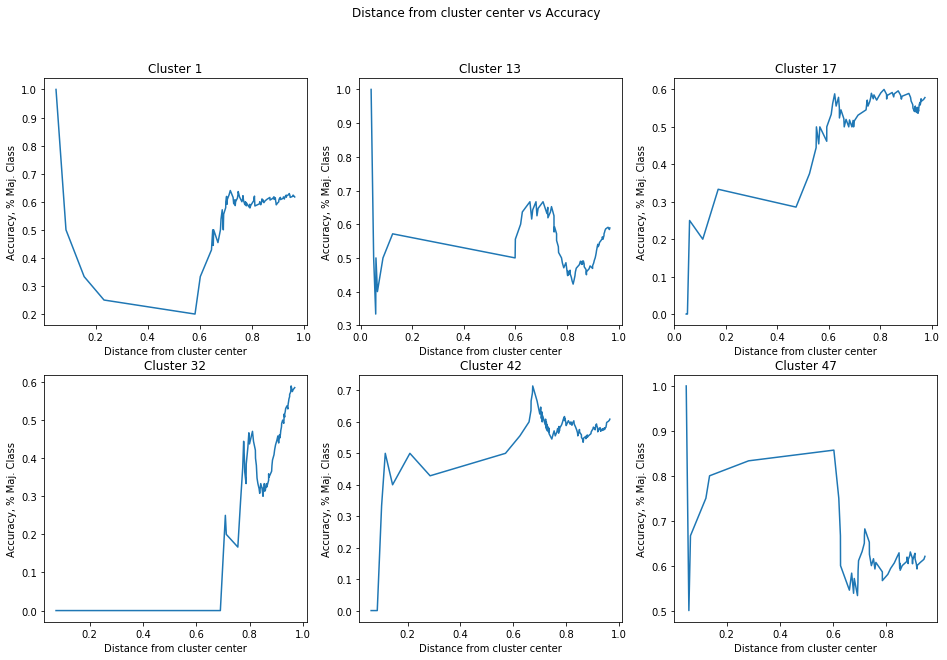

In [9]:
fig = plt.figure(figsize=(16, 10))
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.4,
#                     wspace=.2)


cm = cluster.predictions.cluster_mapping
clusters = np.where(cm['majority_class']==1)[0]
w = min(3, len(clusters))
l = math.ceil(len(clusters) / w)
for i, c in enumerate(clusters):
    ax = fig.add_subplot(l, w, i + 1)
    ax.set_xlabel('Distance from cluster center')
    ax.set_ylabel('Accuracy, % Maj. Class')
    ax.set_title('Cluster %d' % c)
    cluster.feature_space.plot_acc(c, ax, 'distance')
    
fig.suptitle('Distance from cluster center vs Accuracy')
    
plt.show()